
Se importan las librerías que vamos a usar

In [21]:
import numpy as np
import plotly.graph_objects as go
import random
import matplotlib
import matplotlib.pyplot as plt 





In [22]:
##ArrayRectangles2 = [(80,30),(50,10),(20,20),(10,10),(90,40),(60,20),(40,30),(50,70),(30,20),(40,20)]
ArrayRectangles = [(90,40),(50,70),(80,30),(40,30),(60,20),(40,20),(30,20),(50,10),(20,20),(10,10)]
Pmut = 0.2

##FUNCTIONS
def calSize(array):
  A = array[0]*(ArrayRectangles[0][0]*ArrayRectangles[0][1]) + array[1]*(ArrayRectangles[1][0]*ArrayRectangles[1][1]) + array[2]*(ArrayRectangles[2][0]*ArrayRectangles[2][1]) + array[3]*(ArrayRectangles[3][0]*ArrayRectangles[3][1])+ array[4]*(ArrayRectangles[4][0]*ArrayRectangles[4][1])+array[5]*(ArrayRectangles[5][0]*ArrayRectangles[5][1])+array[6]*(ArrayRectangles[6][0]*ArrayRectangles[6][1])+array[7]*(ArrayRectangles[7][0]*ArrayRectangles[7][1])+array[8]*(ArrayRectangles[8][0]*ArrayRectangles[8][1])+array[9]*(ArrayRectangles[9][0]*ArrayRectangles[9][1])
  return A

def calZ(array):
  aux = []
  for a in array:
    aux.append(sum(a))
  return np.transpose(aux)

def calSizeTotal(array):
  aux = []
  for a in array:
    aux.append(calSize(a))
  return np.transpose(aux)

def generatePopulationInitial():
  individuals = []
  for a in range(4):
    x2 = np.random.uniform(low=0, high=2, size=(10,)).astype(int)
    individuals.append(x2)
  for a in individuals:
    if(calSize(a) > 10000):
      return generatePopulationInitial()
  return individuals

def calculateProbability(array):
  aux = calZ(array)
  auxPro = []
  for a in aux:
    auxPro.append(round(a/sum(aux),4))
  return auxPro

def calculateProbabilityAcummulative(array):
  auxProAcu = []
  auxProAcu.append(array[0])
  for a in range(1,4):
    auxProAcu.append(round(auxProAcu[a-1] + array[a],4))
  return auxProAcu

##Primero: Generar dos aleatorios para ser seleccionados.
def generateParents(ProbabilityAccumulative,inititalPopulation):
  parents = [0]*2
  parent1 = random.random()
  parent2 = random.random()
  for a in range(4):
    if parent1 <ProbabilityAccumulative[a]:
      parents[0] = a
      break
  for a in range(4):
    if parent2 <ProbabilityAccumulative[a]:  
      parents[1] = a
      break
  ##if (inititalPopulation[parents[0]] == inititalPopulation[parents[1]]).all():
    ##return generateParents(ProbabilityAccumulative,inititalPopulation)
  ##else:
  Population = []
  Population.append(inititalPopulation[parents[0]])
  Population.append(inititalPopulation[parents[1]])
  return Population

##Tercero: Generar un aleatorio llamado punto de corte y este debe ser aplicado en intervalos de 0.11
##Cuarto: Realizar cruce entre padres
def GenerateChilds(Parents):
  CutoffPoint = random.random()
  Cut = 0
  max = (len(Parents[0])/(len(Parents[0])-1))* 0.1
  for a in range(1,len(Parents[0])):
    if (CutoffPoint <max * a):
      Cut = a
      break
  childs = []
  first = [*Parents[0][0:Cut], *Parents[1][Cut:len(Parents[1])]]
  second = [*Parents[1][0:Cut], *Parents[0][Cut:len(Parents[1])]]
  childs.append(first)
  childs.append(second)
  return childs
##Quinto: Generar un número aleatorio para cada uno de los genes entre 0 y 1 y deben ser comparados con la probabilidad de mutación. Aquellos que sean menores a la probabilidad de mutación, deben ser cambiados en su bit.

def GenerateMutation(childs):
  mutationChild1 = []
  mutationChild2 = []
  for i in range(10):
    mutationChild1.append(random.random())
    mutationChild2.append(random.random())
  for i in range(10):
    if(mutationChild1[i]<Pmut):
      if childs[0][i] == 0:
        childs[0][i] = 1
      else:
        childs[0][i] = 0
    if(mutationChild2[i]<Pmut):
      if childs[1][i] == 0:
        childs[1][i] = 1
      else:
        childs[1][i] = 0
  return childs
##Sexto: Evaluar resultado:  

def generateNewParents(inititalPopulation):
  newPopulation = []
  Probability = np.transpose(calculateProbability(inititalPopulation))
  ProbabilityAccumulative = np.transpose(calculateProbabilityAcummulative(Probability))
  while(len(newPopulation)<4):
    twoParents = generateParents(ProbabilityAccumulative,inititalPopulation)
    childs = GenerateChilds(twoParents)
    newChilds = GenerateMutation(childs)
    size1 = calSize(newChilds[0])
    size2 = calSize(newChilds[1])
    if(size1 < 10000 and len(newPopulation)<4):
      newPopulation.append(newChilds[0])
    if(size2 < 10000 and len(newPopulation)<4 ):
      newPopulation.append(newChilds[1])
  return newPopulation

def showTable(population):
  individuals2 = np.transpose(population)
  Probability = np.transpose(calculateProbability(population))
  ProbabilityAccumulative = np.transpose(calculateProbabilityAcummulative(Probability))
  fig = go.Figure(data=[go.Table(header=dict(values=['Ind','x1', 'x2','x3', 'x4','x5', 'x6','x7', 'x8','x9', 'x10','Z','size','Probab', 'Probab Acum']),
                 cells=dict(values=[[1,2,3,4],individuals2[0], individuals2[1],individuals2[2],individuals2[3],individuals2[4], individuals2[5],individuals2[6],individuals2[7], individuals2[8],individuals2[9], calZ(population), calSizeTotal(population),Probability,ProbabilityAccumulative]))
                     ])
  fig.show()
def bestIndividuals():
  inititalPopulation = generatePopulationInitial()
  maxZwSize = [0]*2
  for a in range(4):
    if (maxZwSize[0] <= calZ(inititalPopulation)[a] and maxZwSize[1] <= calSizeTotal(inititalPopulation)[a]):
        maxZwSize[0] = calZ(inititalPopulation)[a]
        maxZwSize[1] = calSizeTotal(inititalPopulation)[a]
  Zmax = maxZwSize[0]
  ZSize = maxZwSize[1]
  maxZwSizeAux = [0]*2
  for i in range(100):
    newGeneration = generateNewParents(inititalPopulation)
    for a in range(4):
      if (maxZwSizeAux[0] <= calZ(newGeneration)[a] and maxZwSizeAux[1] <= calSizeTotal(newGeneration)[a]):
          maxZwSizeAux[0] = calZ(newGeneration)[a]
          maxZwSizeAux[1] = calSizeTotal(newGeneration)[a]
    if(maxZwSizeAux[0] >= Zmax and maxZwSizeAux[1] >= ZSize) :
      Zmax = maxZwSizeAux[0]
      ZSize = maxZwSizeAux[1]
      maxZwSizeAux[0] = 0
      maxZwSizeAux[1] = 0
      inititalPopulation = newGeneration
  showTable(inititalPopulation)
  index = 0
  for a in range(4):
    if (maxZwSize[0] <= calZ(inititalPopulation)[a] and maxZwSize[1] <= calSizeTotal(inititalPopulation)[a]):
        maxZwSize[0] = calZ(inititalPopulation)[a]
        maxZwSize[1] = calSizeTotal(inititalPopulation)[a]
        index = a
  return inititalPopulation[index]
best = bestIndividuals()
otherBest = []
for a in best:
  if(a==0):
    otherBest.append(1)
  else:
    otherBest.append(0)

2. 

In [23]:
Pmut = 0.15
def generateXYO(array):
  coordinates = []
  o = np.random.uniform(low=0, high=2, size=(1,)).astype(int)
  x = np.random.uniform(low=0, high=(12 - array[1]/10), size=(1,)).astype(int)
  y = np.random.uniform(low=0, high=(12 - array[0]/10), size=(1,)).astype(int)
  coordinates.append(x[0])
  coordinates.append(y[0])
  coordinates.append(o[0])
  return coordinates



def fillRectangle(array, valuesArray):
  matrix = np.zeros((12,12), dtype=np.int)
  for c in range(len(array)):  
    for a in range(array[c][0],int(array[c][0]+valuesArray[c][1]/10)):
      for b in range(array[c][1],int(array[c][1]+valuesArray[c][0]/10)):
        if(array[c][2] == 1):
          matrix[a,b] = c + 1
        else:
          matrix[b,a] = c + 1
  return matrix

def generateZmatrix(matrix):
  Z = 0
  for a in range(10):
    for b in range(10):
      if (matrix[a,b] == 0):
        Z = Z + 1
  return 100 - Z
   
def generateIndividualsFill(bestIndividual): 
  ArrayInidividualsFillRectangle = []
  ArrayFillRectangle = []
  Ztotal = []
  for a in range(10):
    if(bestIndividual[a] == 1):
      ArrayFillRectangle.append(ArrayRectangles[a])
  for c in range(4):
    ArrayCoordinatesRandom = []
    ArrayCoordinatesRandom.append([0,0,1])
    for a in range(1,len(ArrayFillRectangle)):
      ArrayCoordinatesRandom.append(generateXYO(ArrayFillRectangle[a]))
    matriXA = fillRectangle(ArrayCoordinatesRandom,ArrayFillRectangle)
    arrar = []
    arrar.append(generateZmatrix(matriXA))
    Ztotal.append(arrar)
    ArrayInidividualsFillRectangle.append(ArrayCoordinatesRandom)
  return ArrayInidividualsFillRectangle, Ztotal,ArrayFillRectangle

def GenerateMutationRectangle(childs, values):
  mutationChild11 = []
  mutationChild22 = []
  for i in range(len(childs[0])):
    mutationChild11.append(random.random())
    mutationChild22.append(random.random())
  for i in range(len(childs[0])):
    if(mutationChild11[i]<Pmut):
      childs[0][i] = generateXYO(values[i])
    if(mutationChild22[i]<Pmut):
      childs[1][i] = generateXYO(values[i])
  return childs

def generateNewParentsRectangle(newIndividualsRectangle):
  newPopulationRectangle = []
  Ztotal = []
  newProbability = np.transpose(calculateProbability(newIndividualsRectangle[1]))
  newProbabilityAccumulative = np.transpose(calculateProbabilityAcummulative(newProbability))
  while(len(newPopulationRectangle)<4):
    parentsRectangle = generateParents(newProbabilityAccumulative,newIndividualsRectangle[0])
    childsRectangle = GenerateChilds(parentsRectangle)
    mutationRectangle = GenerateMutationRectangle(childsRectangle,newIndividualsRectangle[2])
    newPopulationRectangle.append(mutationRectangle[0])
    ###if(sizeChildB>sizeParentA or sizeChildB>sizeParentB):
    newPopulationRectangle.append(mutationRectangle[1])
  for a in newPopulationRectangle:
    matriXA = fillRectangle(a,newIndividualsRectangle[2])
    arrar = []
    arrar.append(generateZmatrix(matriXA))
    Ztotal.append(arrar)

  return newPopulationRectangle,Ztotal,newIndividualsRectangle[2]


def bestRectangles(best):
  Z = 0
  zAux = 0
  m = 0
  newIndividualsRectangle = generateIndividualsFill(best)
  newIndividualsRectangleAux = newIndividualsRectangle
  for a in newIndividualsRectangle[2]:
    Z = Z + (a[0]*a[1])
  for a in range(len(newIndividualsRectangle[1])):
    if (zAux <= newIndividualsRectangle[1][a][0]):
        zAux = newIndividualsRectangle[1][a][0]
        m = a
  aux = 0
  while (zAux != int(Z/100)):
    if (aux == 15000):
      newGenerationRectangles = generateNewParentsRectangle(newIndividualsRectangleAux)
      aux = 0
      zAux = 0
    else:
      newGenerationRectangles = generateNewParentsRectangle(newIndividualsRectangle)
    if(max(newGenerationRectangles[1])[0]>zAux):
      zAux = max(newGenerationRectangles[1])[0]
      newIndividualsRectangle = newGenerationRectangles
      ##print(newIndividualsRectangle[1])
      t = max(newIndividualsRectangle[1])
      m = newIndividualsRectangle[1].index(t)
      ##print(fillRectangle(newIndividualsRectangle[0][m],newIndividualsRectangle[2]))
    else:
      aux =aux + 1
  return fillRectangle(newIndividualsRectangle[0][m],newIndividualsRectangle[2])

sheet1 = bestRectangles(best)


In [24]:
sheet2 = bestRectangles(otherBest)


In [25]:
def drawSheet(sheet):
  N = 10
  data = np.ones((N, N)) * np.nan
  for a in range(len(sheet)):
    for b in range(len(sheet[a])):
      if(sheet[a,b] != 0):
        data[a,b] = sheet[a,b]
  fig, ax = plt.subplots(1, 1, tight_layout=True)
  my_cmap = matplotlib.colors.ListedColormap(['#E82929', '#E88629', '#DFE829','#49E829','#29E8C2','#2935E8','#D429E8','#817F61'])
  my_cmap.set_bad(color='w', alpha=0)
  for x in range(N + 1):
      ax.axhline(x, lw=2, color='k', zorder=5)
      ax.axvline(x, lw=2, color='k', zorder=5)
  ax.imshow(data, interpolation='none', cmap=my_cmap, extent=[0, N, 0, N], zorder=0)
  ax.axis('off')
  ax.title.set_text('Lámina')


Lámina 1

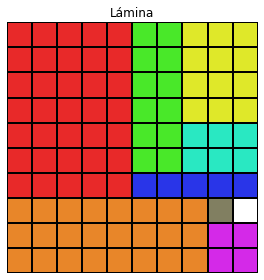

In [26]:
drawSheet(sheet1)


Lámina 2

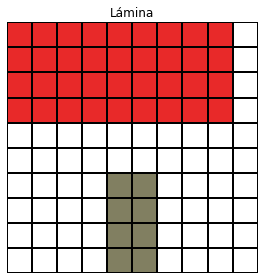

In [27]:
drawSheet(sheet2)
